# Question 3

### Data Input

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
ret_y = pd.read_table('returns_annual.txt', delim_whitespace= True, skiprows = 6, header = None)
ret_m = pd.read_table('returns_monthly.txt', delim_whitespace= True, skiprows = 5, header = None)
ret_d = pd.read_table('returns_daily.txt', delim_whitespace= True, skiprows = 6, header = None)

ret_y.columns = ['date','mkeret','bondret']
ret_m.columns = ['date','mkeret','bondret']
ret_d.columns = ['date','mkeret','bondret']

## A 
Estimate the means, variances, and standard deviations of returns, at all three frequencies. What are the covariances and correlations between the returns on stocks and bonds, at various frequencies? 


In [4]:
mkt_mean_y = ret_y.mkeret.mean()
mkt_mean_m = ret_m.mkeret.mean()
mkt_mean_d = ret_d.mkeret.mean()
bd_mean_y = ret_y.bondret.mean()
bd_mean_m = ret_m.bondret.mean()
bd_mean_d = ret_d.bondret.mean()

mkt_std_y = ret_y.mkeret.std()
mkt_std_m = ret_m.mkeret.std()
mkt_std_d = ret_d.mkeret.std()
bd_std_y = ret_y.bondret.std()
bd_std_m = ret_m.bondret.std()
bd_std_d = ret_d.bondret.std()

mkt_skew_y = ret_y.mkeret.skew()
mkt_skew_m = ret_m.mkeret.skew()
mkt_skew_d = ret_d.mkeret.skew()
bd_skew_y = ret_y.bondret.skew()
bd_skew_m = ret_m.bondret.skew()
bd_skew_d = ret_d.bondret.skew()

mkt_kurt_y = ret_y.mkeret.kurt()
mkt_kurt_m = ret_m.mkeret.kurt()
mkt_kurt_d = ret_d.mkeret.kurt()
bd_kurt_y = ret_y.bondret.kurt()
bd_kurt_m = ret_m.bondret.kurt()
bd_kurt_d = ret_d.bondret.kurt()

cov_y = ret_y.mkeret.cov(ret_y.bondret)
corr_y = ret_y.mkeret.corr(ret_y.bondret)

cov_m = ret_m.mkeret.cov(ret_m.bondret)
corr_m = ret_m.mkeret.corr(ret_m.bondret)

cov_d = ret_d.mkeret.cov(ret_d.bondret)
corr_d= ret_d.mkeret.corr(ret_d.bondret)

stat_table = pd.DataFrame(columns= ['mkt_mean', 'mkt_std','mkt_skew', 'mkt_kurt', 'bond_mean','bond_std','bond_skew','bond_kurt','cov','corr'])

y_stat = pd.DataFrame({'mkt_mean' : mkt_mean_y, 'mkt_std': mkt_std_y, 'mkt_skew' : mkt_skew_y, 'mkt_kurt' : mkt_kurt_y, 'bond_mean' : bd_mean_y, 'bond_std' : bd_std_y, 'bond_skew':bd_skew_y,'bond_kurt':bd_kurt_y, 'cov':cov_y, 'corr':corr_y}, index = ['annual'])
m_stat = pd.DataFrame({'mkt_mean' : mkt_mean_m, 'mkt_std': mkt_std_m, 'mkt_skew' : mkt_skew_m, 'mkt_kurt' : mkt_kurt_m, 'bond_mean' : bd_mean_m, 'bond_std' : bd_std_m, 'bond_skew':bd_skew_m,'bond_kurt':bd_kurt_m, 'cov':cov_m, 'corr':corr_m}, index = ['monthly'])
d_stat = pd.DataFrame({'mkt_mean' : mkt_mean_d, 'mkt_std': mkt_std_d, 'mkt_skew' : mkt_skew_d, 'mkt_kurt' : mkt_kurt_d, 'bond_mean' : bd_mean_d, 'bond_std' : bd_std_d, 'bond_skew':bd_skew_d,'bond_kurt':bd_kurt_d, 'cov':cov_d, 'corr':corr_d}, index = ['daily'])

stat_table = stat_table.append(y_stat)
stat_table = stat_table.append(m_stat)
stat_table = stat_table.append(d_stat)

stat_table

,mkt_mean,mkt_std,mkt_skew,mkt_kurt,bond_mean,bond_std,bond_skew,bond_kurt,cov,corr
annual,0.129170,0.171292,-0.487259,0.223468,0.061856,0.114745,0.804713,0.795443,-0.001677,-0.085343
monthly,0.009967,0.042015,-0.544248,1.918234,0.004968,0.027652,0.559753,3.597343,0.000068,0.058119
daily,0.000419,0.009702,-0.543385,16.017309,0.000037,0.005422,0.053110,6.845772,0.000001,0.020984


## B
Estimate the skewness and kurtosis of returns. Based on these statistics, do returns
appear to be drawn from a normal distribution?

Response: according to the skewness and kurtosis term above, returns do not appear to be drawn from a normal distribution

## C

Create the histograms of stock and bond returns at different frequencies. How
close are the empirical distributions to the normal distribution?

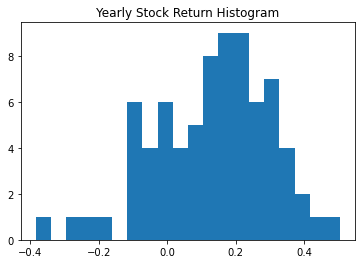

In [5]:
plt.hist(ret_y.mkeret, bins = 20)
plt.title('Yearly Stock Return Histogram')
plt.show()

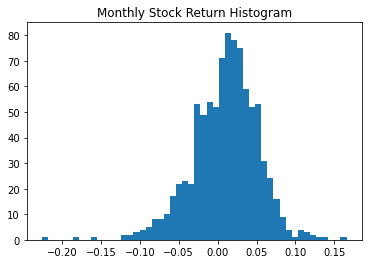

In [6]:
plt.hist(ret_m.mkeret, bins = 50)
plt.title('Monthly Stock Return Histogram')
plt.show()

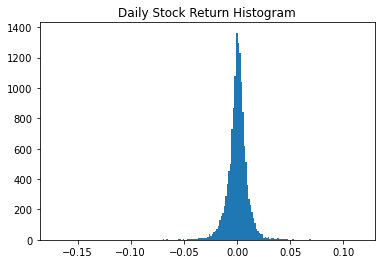

In [7]:
plt.hist(ret_d.mkeret, bins = 200)
plt.title('Daily Stock Return Histogram')
plt.show()

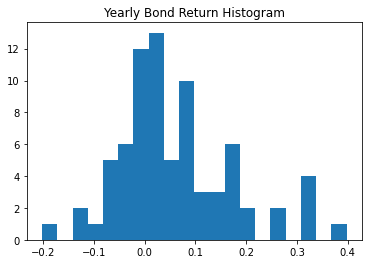

In [8]:
plt.hist(ret_y.bondret, bins = 20)
plt.title('Yearly Bond Return Histogram')
plt.show()

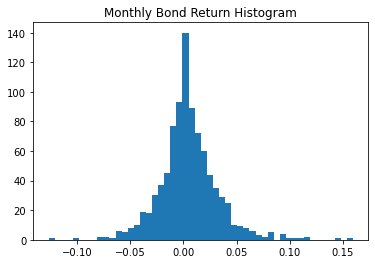

In [9]:
plt.hist(ret_m.bondret, bins = 50)
plt.title('Monthly Bond Return Histogram')
plt.show()

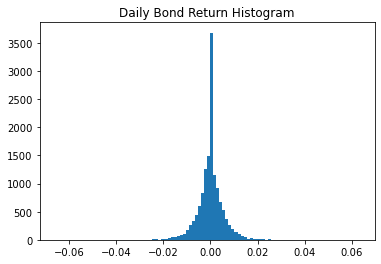

In [10]:
plt.hist(ret_d.bondret, bins = 100)
plt.title('Daily Bond Return Histogram')
plt.show()

## D

Compute the 95% confidence intervals for the stock (bond) return over the next period (day, month, year). Compute the 95% confidence interval for the arithmetic average stock (bond) return over the following 30 periods (days, months, years). 

In [14]:
print ("Confidence interval for stock return next year is [%.4f, %.4f], for arithmetic return over next 30 years is [%.4f, %.4f]" %(mkt_mean_y - 1.96 * mkt_std_y, mkt_mean_y + 1.96 * mkt_std_y, mkt_mean_y - 1.96 * mkt_std_y / 30**0.5, mkt_mean_y + 1.96 * mkt_std_y / 30**0.5))
print ("Confidence interval for stock return next month is [%.4f, %.4f], for arithmetic return over next 30 months is [%.4f, %.4f]" %(mkt_mean_m - 1.96 * mkt_std_m, mkt_mean_m + 1.96 * mkt_std_m, mkt_mean_m - 1.96 * mkt_std_m / 30**0.5, mkt_mean_m + 1.96 * mkt_std_m/30**0.5))
print ("Confidence interval for stock return next day is [%.4f, %.4f], for arithmetic return over next 30 days is [%.4f, %.4f]" %(mkt_mean_d - 1.96 * mkt_std_d, mkt_mean_d + 1.96 * mkt_std_d,mkt_mean_d - 1.96 * mkt_std_d/30**0.5, mkt_mean_d + 1.96 * mkt_std_d/30**0.5))

print ("Confidence interval for bond return next year is [%.4f, %.4f], for arithmetic return over next 30 years is [%.4f, %.4f]" %(bd_mean_y - 1.96 * bd_std_y, bd_mean_y + 1.96 * bd_std_y,bd_mean_y - 1.96 * bd_std_y/30**0.5, bd_mean_y + 1.96 * bd_std_y/30**0.5))
print ("Confidence interval for stock return next month is [%.4f, %.4f], for arithmetic return over next 30 months is [%.4f, %.4f]" %(bd_mean_m - 1.96 * bd_std_m, bd_mean_m + 1.96 * bd_std_m,bd_mean_m - 1.96 * bd_std_m/30**0.5, bd_mean_m + 1.96 * bd_std_m/30**0.5))
print ("Confidence interval for stock return next day is [%.4f, %.4f], for arithmetic return over next 30 days is [%.4f, %.4f]" %(bd_mean_d - 1.96 * bd_std_d, bd_mean_d + 1.96 * bd_std_d, bd_mean_d - 1.96 * bd_std_d/30**0.5, bd_mean_d + 1.96 * bd_std_d/30**0.5))




Confidence interval for stock return next year is [-0.2066, 0.4649], for arithmetic return over next 30 years is [0.0679, 0.1905]
Confidence interval for stock return next month is [-0.0724, 0.0923], for arithmetic return over next 30 months is [-0.0051, 0.0250]
Confidence interval for stock return next day is [-0.0186, 0.0194], for arithmetic return over next 30 days is [-0.0031, 0.0039]
Confidence interval for bond return next year is [-0.1630, 0.2868], for arithmetic return over next 30 years is [0.0208, 0.1029]
Confidence interval for stock return next month is [-0.0492, 0.0592], for arithmetic return over next 30 months is [-0.0049, 0.0149]
Confidence interval for stock return next day is [-0.0106, 0.0107], for arithmetic return over next 30 days is [-0.0019, 0.0020]


## E
Compute the absolute shortfall probabilities for stocks and bonds. That is, for a cutoff level k, compute the probability that the return over the next period (day, month, year) will be lower than k. Plot this probability as a function of the threshold level k, for k = −20%, −10%, 0, 10%, 20%.

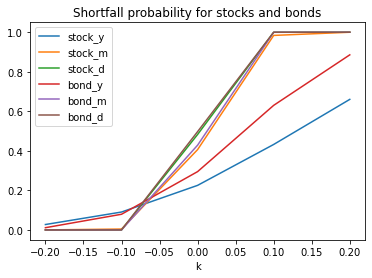

,stock_y,stock_m,stock_d,bond_y,bond_m,bond_d
k,,,,,,
-0.2,0.0273224,2.90424e-07,4.19156e-95,0.0112429,6.1951e-14,2.61082e-298
-0.1,0.090466,0.00443072,2.08636e-25,0.0791864,7.34941e-05,2.52325e-76
0.0,0.225397,0.406239,0.482771,0.29492,0.428707,0.497268
0.1,0.432389,0.983939,1,0.630217,0.999706,1
0.2,0.660381,0.999997,1,0.88569,1,1


In [15]:
k = [-0.2, -0.1, 0, 0.1, 0.2]
cutoff = pd.DataFrame(columns = ['k','stock_y','stock_m','stock_d','bond_y','bond_m','bond_d'])
cutoff['k'] = k

for i in range(0,len(cutoff)):
    cutoff.loc[i,'stock_y'] = norm.cdf((cutoff.loc[i,'k']-mkt_mean_y)/mkt_std_y)
    cutoff.loc[i,'stock_m'] = norm.cdf((cutoff.loc[i,'k']-mkt_mean_m)/mkt_std_m)
    cutoff.loc[i,'stock_d'] = norm.cdf((cutoff.loc[i,'k']-mkt_mean_d)/mkt_std_d)
    cutoff.loc[i,'bond_y'] = norm.cdf((cutoff.loc[i,'k']-bd_mean_y)/bd_std_y)
    cutoff.loc[i,'bond_m'] = norm.cdf((cutoff.loc[i,'k']-bd_mean_m)/bd_std_m)
    cutoff.loc[i,'bond_d'] = norm.cdf((cutoff.loc[i,'k']-bd_mean_d)/bd_std_d)

cutoff = cutoff.set_index('k')
cutoff.plot()
plt.title("Shortfall probability for stocks and bonds")
plt.show()

cutoff

## F

Assuming that returns are i.i.d., compute the probability that the stock return over the next period (day, month, year) will be lower than the bond return.

In [12]:
diff_mean_y = mkt_mean_y - bd_mean_y
diff_std_y = (mkt_std_y ** 2 + bd_std_y ** 2) ** 0.5
p_y = norm.cdf(-diff_mean_y/diff_std_y)

diff_mean_m = mkt_mean_m - bd_mean_m
diff_std_m = (mkt_std_m ** 2 + bd_std_m ** 2) ** 0.5
p_m = norm.cdf(-diff_mean_m/diff_std_m)

diff_mean_d = mkt_mean_d - bd_mean_d
diff_std_d = (mkt_std_d ** 2 + bd_std_d ** 2) ** 0.5
p_d = norm.cdf(-diff_mean_d/diff_std_d)

print('The probability that the stock return over the next year will be lower than the bond return is %.4f' %p_y)

print('The probability that the stock return over the next month will be lower than the bond return is %.4f' %p_m)

print('The probability that the stock return over the next day will be lower than the bond return is %.4f' %p_d)


The probability that the stock return over the next year will be lower than the bond return is 0.3720
The probability that the stock return over the next month will be lower than the bond return is 0.4604
The probability that the stock return over the next day will be lower than the bond return is 0.4863
